In [1]:
import pandas as pd

In [2]:
cr = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Logistic\CreditRisk.csv")

In [3]:
cr1 = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Logistic\CreditRisk.csv") 

In [4]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
cr.shape

(981, 13)

In [6]:
# Data related to the person who has taken loan previously
# Bank wants to build a prediction model which can be used to approve or reject the loan
# Target thode customers who are likely to be good customers and try upselling and cross-selling


In [7]:
# Target variable - Loan Status

In [8]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
cr.Gender = cr.Gender.fillna('Male')
cr.Married = cr.Married.fillna('Yes')
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('No')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [10]:
cr.Gender.value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [11]:
cr.Married.value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [12]:
cr.Dependents.value_counts()

0.0    570
1.0    160
2.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [13]:
cr.Self_Employed.value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [14]:
cr.Credit_History.value_counts()
# We will put '0' for Credit History in null values

1.0    754
0.0    227
Name: Credit_History, dtype: int64

In [15]:
from sklearn.preprocessing  import LabelEncoder


In [16]:
le = LabelEncoder()

cr[cr.select_dtypes(include= ['object']).columns]  = cr[cr.select_dtypes(include= ['object']).columns].apply(le.fit_transform)


In [17]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [18]:
cr1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
cr1 = cr
# Just a backup before sampling for problem statement 2

In [19]:
cr=cr.drop(['Loan_ID'], axis=1)


In [20]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
cr_train , cr_test = train_test_split(cr, test_size = .2)

In [23]:
cr_train_x = cr_train.iloc[: ,0:-1]
cr_train_y = cr_train.iloc[: ,-1]
cr_test_x = cr_test.iloc[: ,0:-1]
cr_test_y = cr_test.iloc[: ,-1]

In [24]:
cr_train_x.shape

(784, 11)

In [25]:
# Logistic Regression
# Linear (import sklearn). create an object, fit(x,y), predict

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
cr_logreg = LogisticRegression()


In [28]:
cr_logreg.fit(cr_train_x , cr_train_y)


C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
pred = cr_logreg.predict(cr_test_x)


In [30]:
# Since actual values were in 0 and 1, predicted values will also be in zero and one


In [31]:
pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
# To evaluate the model, we first build confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(cr_test_y, pred)

# prediction from top

array([[ 30,  27],
       [  7, 133]], dtype=int64)

In [35]:
# We can use pd.crosstab as well , but confusion_matrix function should be used

pd.crosstab(cr_test_y, pred)

col_0,0,1
Loan_Status,,
0,30,27
1,7,133


In [36]:
confusion_matrix(pred, cr_test_y)

# prediction from left

array([[ 30,   7],
       [ 27, 133]], dtype=int64)

In [37]:
tab1 = confusion_matrix(cr_test_y, pred)

In [38]:
# Accuracy

(132+26)*100/(26+8+31+132)

80.20304568527919

In [39]:
tab1.diagonal()

array([ 30, 133], dtype=int64)

In [40]:
tab1.diagonal().sum()

# will add the diagonal element, 26 and 132

163

In [41]:
tab1.sum()

# will add all the element in tab1

197

In [42]:
# Accuracy

tab1.diagonal().sum() * 100/tab1.sum()

82.74111675126903

In [43]:
# or

from sklearn.metrics import accuracy_score

accuracy_score(cr_test_y, pred) * 100

82.74111675126903

In [44]:
# What is the TPR/Recall = TP/(TP+FN)

129/(129+16)


0.8896551724137931

In [45]:
from sklearn.metrics import recall_score

In [46]:
# TPR/ Recall

recall_score(cr_test_y,pred)

0.95

In [47]:
# FPR = FP/(FP+TN)

31/(31+21)

0.5961538461538461

In [48]:
# Precision = TP/(TP+FP)

129/(129+31)

0.80625

In [49]:
# Precision

from sklearn.metrics import precision_score

precision_score(cr_test_y,pred)

0.83125

In [50]:
# F1 score/ Harmonic mean = (2 * Precision * Recall)/(Precision + Recall)

2 * .88965 * .80635/(.88965+.80625)

0.8460042189987618

In [51]:
# F1 Score

from sklearn.metrics import f1_score

f1_score(cr_test_y, pred)

0.8866666666666666

In [52]:
# AUROC plot

cr_logreg.predict(cr_test_x)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
pred_prob = cr_logreg.predict_proba(cr_test_x) # prediction in probabilities
pred_prob  # and for each record you get 2 pred prob values (for class zero and one)

array([[0.1322922 , 0.8677078 ],
       [0.4895086 , 0.5104914 ],
       [0.6609556 , 0.3390444 ],
       [0.25992303, 0.74007697],
       [0.19820103, 0.80179897],
       [0.55981837, 0.44018163],
       [0.28483818, 0.71516182],
       [0.17597443, 0.82402557],
       [0.12026435, 0.87973565],
       [0.68337328, 0.31662672],
       [0.20526515, 0.79473485],
       [0.16057675, 0.83942325],
       [0.18626694, 0.81373306],
       [0.0811421 , 0.9188579 ],
       [0.15289888, 0.84710112],
       [0.26691299, 0.73308701],
       [0.18627865, 0.81372135],
       [0.68967589, 0.31032411],
       [0.12187784, 0.87812216],
       [0.65481594, 0.34518406],
       [0.12786802, 0.87213198],
       [0.1636912 , 0.8363088 ],
       [0.20185402, 0.79814598],
       [0.30339218, 0.69660782],
       [0.10284247, 0.89715753],
       [0.20612402, 0.79387598],
       [0.51582962, 0.48417038],
       [0.53163766, 0.46836234],
       [0.16041932, 0.83958068],
       [0.18636756, 0.81363244],
       [0.

In [54]:
 type(pred_prob)

numpy.ndarray

In [55]:
pred_prob.shape

(197, 2)

In [56]:
pred_prob[:, 0]

# will display all rows but only the 1st column corresponding to class zero

array([0.1322922 , 0.4895086 , 0.6609556 , 0.25992303, 0.19820103,
       0.55981837, 0.28483818, 0.17597443, 0.12026435, 0.68337328,
       0.20526515, 0.16057675, 0.18626694, 0.0811421 , 0.15289888,
       0.26691299, 0.18627865, 0.68967589, 0.12187784, 0.65481594,
       0.12786802, 0.1636912 , 0.20185402, 0.30339218, 0.10284247,
       0.20612402, 0.51582962, 0.53163766, 0.16041932, 0.18636756,
       0.2467385 , 0.1549084 , 0.25495884, 0.59285819, 0.27933784,
       0.61932976, 0.17764583, 0.31023915, 0.17053742, 0.09638276,
       0.13991028, 0.17790747, 0.21221518, 0.58170988, 0.19897245,
       0.14492045, 0.47773418, 0.06344836, 0.26199018, 0.13314646,
       0.65744628, 0.28681977, 0.29159524, 0.19512503, 0.34788967,
       0.08749804, 0.25187597, 0.2642012 , 0.2345665 , 0.30098209,
       0.24308362, 0.13514042, 0.13002937, 0.13926296, 0.21864638,
       0.21049342, 0.12532761, 0.21529263, 0.55272026, 0.35448612,
       0.53028278, 0.17264224, 0.13566261, 0.15931682, 0.13953

In [57]:
pred_prob[:, 1]

# will display all rows but only the 2nd column corresponding to class one

array([0.8677078 , 0.5104914 , 0.3390444 , 0.74007697, 0.80179897,
       0.44018163, 0.71516182, 0.82402557, 0.87973565, 0.31662672,
       0.79473485, 0.83942325, 0.81373306, 0.9188579 , 0.84710112,
       0.73308701, 0.81372135, 0.31032411, 0.87812216, 0.34518406,
       0.87213198, 0.8363088 , 0.79814598, 0.69660782, 0.89715753,
       0.79387598, 0.48417038, 0.46836234, 0.83958068, 0.81363244,
       0.7532615 , 0.8450916 , 0.74504116, 0.40714181, 0.72066216,
       0.38067024, 0.82235417, 0.68976085, 0.82946258, 0.90361724,
       0.86008972, 0.82209253, 0.78778482, 0.41829012, 0.80102755,
       0.85507955, 0.52226582, 0.93655164, 0.73800982, 0.86685354,
       0.34255372, 0.71318023, 0.70840476, 0.80487497, 0.65211033,
       0.91250196, 0.74812403, 0.7357988 , 0.7654335 , 0.69901791,
       0.75691638, 0.86485958, 0.86997063, 0.86073704, 0.78135362,
       0.78950658, 0.87467239, 0.78470737, 0.44727974, 0.64551388,
       0.46971722, 0.82735776, 0.86433739, 0.84068318, 0.86046

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve

In [59]:
roc_auc_score(cr_test_y, pred_prob[:,1])

# actual values, pred prob for class 1
# area under the curve

0.8136591478696743

In [60]:
# AUROC (FPR, TPR) at various Threshold

In [61]:
fpr, tpr, threshold = roc_curve(cr_test_y, pred_prob[:,1])

In [62]:
fpr

array([0.        , 0.        , 0.        , 0.01754386, 0.01754386,
       0.05263158, 0.05263158, 0.07017544, 0.07017544, 0.0877193 ,
       0.0877193 , 0.12280702, 0.12280702, 0.15789474, 0.15789474,
       0.1754386 , 0.1754386 , 0.19298246, 0.19298246, 0.21052632,
       0.21052632, 0.22807018, 0.22807018, 0.24561404, 0.24561404,
       0.26315789, 0.26315789, 0.28070175, 0.28070175, 0.29824561,
       0.29824561, 0.31578947, 0.31578947, 0.33333333, 0.33333333,
       0.35087719, 0.35087719, 0.36842105, 0.36842105, 0.38596491,
       0.38596491, 0.40350877, 0.40350877, 0.42105263, 0.42105263,
       0.64912281, 0.64912281, 0.66666667, 0.66666667, 0.78947368,
       0.78947368, 0.92982456, 0.92982456, 1.        ])

In [63]:
tpr

array([0.        , 0.00714286, 0.08571429, 0.08571429, 0.20714286,
       0.20714286, 0.22142857, 0.22142857, 0.4       , 0.4       ,
       0.41428571, 0.41428571, 0.44285714, 0.44285714, 0.58571429,
       0.58571429, 0.62142857, 0.62142857, 0.63571429, 0.63571429,
       0.64285714, 0.64285714, 0.68571429, 0.68571429, 0.69285714,
       0.69285714, 0.7       , 0.7       , 0.74285714, 0.74285714,
       0.75714286, 0.75714286, 0.82142857, 0.82142857, 0.86428571,
       0.86428571, 0.9       , 0.9       , 0.90714286, 0.90714286,
       0.92857143, 0.92857143, 0.94285714, 0.94285714, 0.95      ,
       0.95      , 0.97142857, 0.97142857, 0.97857143, 0.97857143,
       0.99285714, 0.99285714, 1.        , 1.        ])

In [64]:
threshold

array([1.94646998, 0.94646998, 0.89715753, 0.89434648, 0.87053058,
       0.86846063, 0.86685354, 0.86665471, 0.84091285, 0.84068318,
       0.83958068, 0.83930515, 0.83501186, 0.8313756 , 0.80579906,
       0.80487497, 0.80102755, 0.79826499, 0.79526723, 0.7948609 ,
       0.79473485, 0.79387598, 0.78470737, 0.78455427, 0.78379331,
       0.7820265 , 0.78170839, 0.78135362, 0.77436344, 0.77421208,
       0.76763388, 0.7654335 , 0.74513082, 0.74504116, 0.72066216,
       0.71516182, 0.69901791, 0.69660782, 0.69374551, 0.68976085,
       0.64551388, 0.64144165, 0.60440007, 0.54359484, 0.52226582,
       0.44505049, 0.4200303 , 0.41829012, 0.41744836, 0.37585902,
       0.35375738, 0.31032411, 0.30901351, 0.24821628])

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Area under the curve is .6979 ')

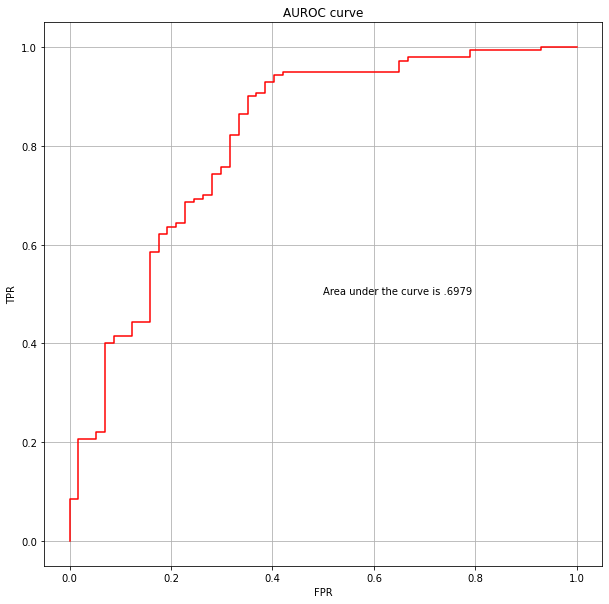

In [66]:
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color = 'red')
plt.title('AUROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.text(x= .5, y= .5, s='Area under the curve is .6979 ')

In [67]:
# We created the model and model seems to be working good.

# Lets use the same model for running our marketing campaign

# Target those customers who are likely to be good customers and try doing upselling and cross-selling



In [68]:
# Do you want to target all customers??

# Test, Train or Both

# Answer is Both, as our model is already built and we will filter the customer based on their probability value.

In [69]:
pred_prob_full = cr_logreg.predict_proba(cr.iloc[:, 0:-1])
type(pred_prob_full)

numpy.ndarray

In [70]:
pred_prob_full = pd.DataFrame(pred_prob_full)
pred_prob_full

,0,1
0,0.142180,0.857820
1,0.191965,0.808035
2,0.080107,0.919893
3,0.127823,0.872177
4,0.142068,0.857932
...,...,...
976,0.140927,0.859073
977,0.095427,0.904573
978,0.616515,0.383485
979,0.192293,0.807707


In [71]:
a = pred_prob_full

In [72]:
l1 = list(a.columns)

In [73]:
l1

[0, 1]

In [74]:
l1[0] = 'Pred0'
l1[1] = 'Pred1'

In [75]:
l1

['Pred0', 'Pred1']

In [76]:
a.columns = l1

In [77]:
a

,Pred0,Pred1
0,0.142180,0.857820
1,0.191965,0.808035
2,0.080107,0.919893
3,0.127823,0.872177
4,0.142068,0.857932
...,...,...
976,0.140927,0.859073
977,0.095427,0.904573
978,0.616515,0.383485
979,0.192293,0.807707


In [78]:
# or

pred_prob_full = pred_prob_full.rename({'0': 'Pred0', '1': 'Pred1'})

In [79]:
pred_prob_full

,Pred0,Pred1
0,0.142180,0.857820
1,0.191965,0.808035
2,0.080107,0.919893
3,0.127823,0.872177
4,0.142068,0.857932
...,...,...
976,0.140927,0.859073
977,0.095427,0.904573
978,0.616515,0.383485
979,0.192293,0.807707


In [80]:
# or

pred_prob_full = pred_prob_full.rename(columns={pred_prob_full.columns[0] : 'Pred0',
                                               pred_prob_full.columns[1] : 'Pred1'})

In [81]:
pred_prob_full

,Pred0,Pred1
0,0.142180,0.857820
1,0.191965,0.808035
2,0.080107,0.919893
3,0.127823,0.872177
4,0.142068,0.857932
...,...,...
976,0.140927,0.859073
977,0.095427,0.904573
978,0.616515,0.383485
979,0.192293,0.807707


In [82]:
pred_prob_full['Loan_Id'] = cr1.Loan_ID

# We saved original data to cr1 in the start , in order to import the column in this table

# We are adding Loan_Id as it is a Unique Identifier 

In [83]:
pred_prob_full

,Pred0,Pred1,Loan_Id
0,0.142180,0.857820,LP001002
1,0.191965,0.808035,LP001003
2,0.080107,0.919893,LP001005
3,0.127823,0.872177,LP001006
4,0.142068,0.857932,LP001008
...,...,...,...
976,0.140927,0.859073,LP002971
977,0.095427,0.904573,LP002975
978,0.616515,0.383485,LP002980
979,0.192293,0.807707,LP002986


In [84]:
pred_prob_full = pred_prob_full.sort_values('Pred1', ascending= False)

# This will give us the highest probability on the top and the sales team will call them from Loan_Id

In [85]:
pred_prob_full

,Pred0,Pred1,Loan_Id
686,0.052081,0.947919,LP001375
14,0.053530,0.946470,LP001030
575,0.054315,0.945685,LP002868
133,0.060489,0.939511,LP001482
164,0.060502,0.939498,LP001572
...,...,...,...
965,0.753668,0.246332,LP002901
600,0.785429,0.214571,LP002949
409,0.795451,0.204549,LP002317
925,0.795663,0.204337,LP002747


In [86]:
pred_prob_full.to_csv('saving_this_directory.csv')

# If I want to save the dataframe pred_prob_full into csv, so that the sales team get access
# The file will be saved by the name 'saving_this_directory' in csv format

In [91]:
import sys



In [92]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [93]:
pwd

# File location

'C:\\Users\\RahulK'